In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import scipy.special as special

In [218]:
plt.style.use("../../style1.mplstyle")

In [2]:
d_rates = pd.read_csv('../data/D_rates.csv')
growth_params = pd.read_csv('../data/fitted_growth_parameters.csv')

In [3]:
filtered_d_rates = d_rates.dropna().to_numpy()[:,1]
filtered_d_rates = filtered_d_rates[filtered_d_rates > 0]
filtered_growth_rates = growth_params["max_growth_rate"].dropna().to_numpy()

In [206]:
km_data = pd.read_csv('../data/km_vals.csv')
km_data = km_data.dropna().to_numpy()

sugars = ["glucose","fructose","maltose","arabinose","lactose"]

kmIndices = []
for sugar in sugars:
    kmIndices = kmIndices + list(np.where(km_data[:,0] == sugar)[0])

km_values = np.array(km_data[:,1][kmIndices]).astype(float)


In [235]:
gamma_fn = lambda x,theta,k: x**(k-1)*np.exp(-theta*x) / special.gamma(k) / theta**k
gaussian_fn = lambda x,mu,sigma: 1/np.sqrt(2*np.pi)*np.exp(-(x-mu)**2/2/sigma**2)  /sigma
gamma_ccdf_fn = lambda x,theta,k: 98*special.gammaincc(k,theta*x)

lognormal_fn = lambda x,mu,sigma: 1/x/np.sqrt(2*np.pi*sigma**2)*np.exp(-(np.log(x)-mu)**2/2/sigma**2)

In [266]:
log_d_bins = np.linspace(np.log(filtered_d_rates.min()),np.log(filtered_d_rates.max()),20)
log_d_hist,log_d_edges = np.histogram(np.log(filtered_d_rates),bins=log_d_bins,density=True)

log_d_centers = (log_d_edges[1:]+log_d_edges[:-1])/2

log_d_gaussian_fit = optimize.curve_fit(gaussian_fn,log_d_centers,log_d_hist,p0=[np.mean(np.log(filtered_d_rates)),np.std(np.log(filtered_d_rates))])

In [267]:
log_growth_bins = np.linspace(np.log(filtered_growth_rates.min()),np.log(filtered_growth_rates.max()),20)
log_growth_hist,log_growth_edges = np.histogram(np.log(filtered_growth_rates),bins=log_growth_bins,density=True)

log_growth_centers = (log_growth_edges[1:]+log_growth_edges[:-1])/2

log_growth_gaussian_fit = optimize.curve_fit(gaussian_fn,log_growth_centers,log_growth_hist,p0=[np.mean(np.log(filtered_growth_rates)),np.std(np.log(filtered_growth_rates))])

In [268]:
log_km_bins = np.linspace(np.log(km_values.min()),np.log(km_values.max()),20)
log_km_hist,log_km_edges = np.histogram(np.log(km_values),bins=log_km_bins,density=True)

log_km_centers = (log_km_edges[1:]+log_km_edges[:-1])/2

log_km_gaussian_fit = optimize.curve_fit(gaussian_fn,log_km_centers,log_km_hist,p0=[np.mean(np.log(km_values)),np.std(np.log(km_values))])

In [278]:
print("Leakage lognormal parameters: ",log_d_gaussian_fit[0])
print("Growth rate lognormal parameters: ",log_growth_gaussian_fit[0])
print("Km lognormal parameters: ",log_km_gaussian_fit[0])

Leakage lognormal parameters:  [-8.77665915  2.75404233]
Growth rate lognormal parameters:  [-1.94569161  0.99014601]
Km lognormal parameters:  [3.41843066 3.61662863]


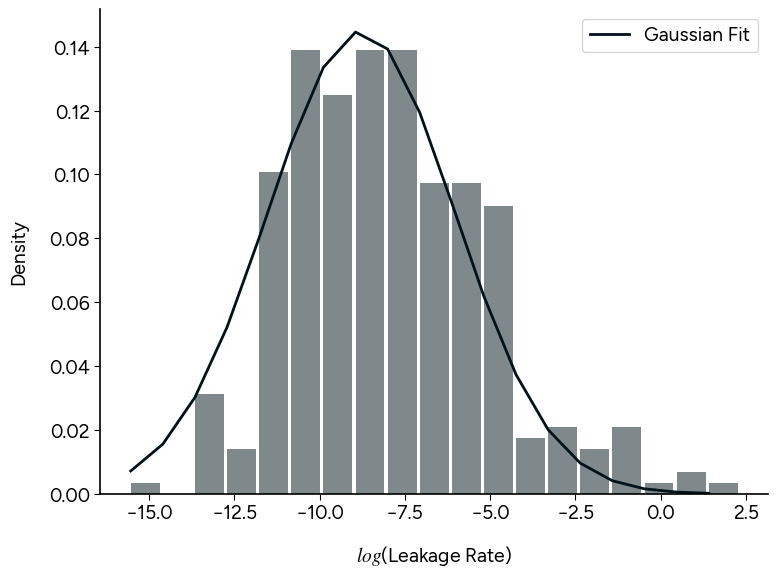

In [276]:
plt.bar(log_d_centers,log_d_hist, width=np.diff(log_d_edges)*0.9, align='edge', alpha=0.5)
plt.plot(log_d_centers, gaussian_fn(log_d_centers,*log_d_gaussian_fit[0]), label='Gaussian Fit')

# plt.xscale('log')
plt.legend()
plt.xlabel("$log$(Leakage Rate)")
plt.ylabel("Density")

plt.show()

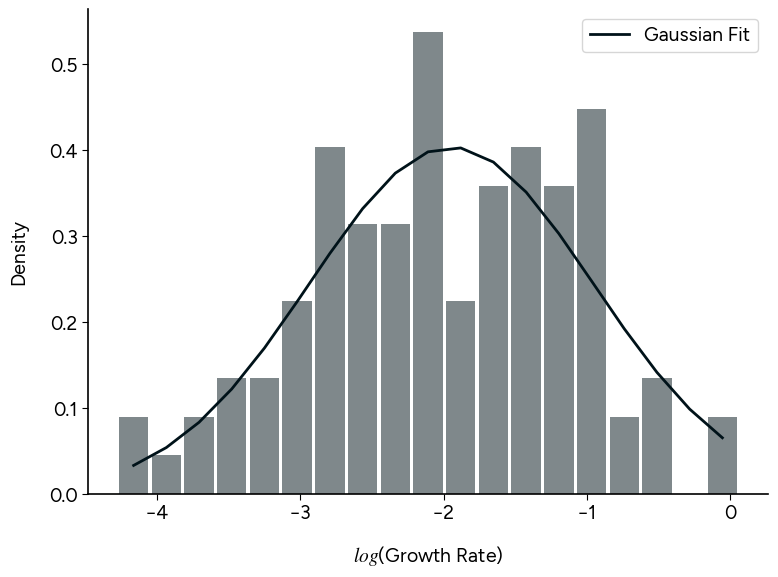

In [274]:
plt.bar(log_growth_centers,log_growth_hist,width=np.diff(log_growth_edges)*0.9,alpha=0.5)
plt.plot(log_growth_centers, gaussian_fn(log_growth_centers,*log_growth_gaussian_fit[0]), label='Gaussian Fit')

plt.legend()
plt.xlabel("$log$(Growth Rate)")
plt.ylabel("Density")

plt.show()

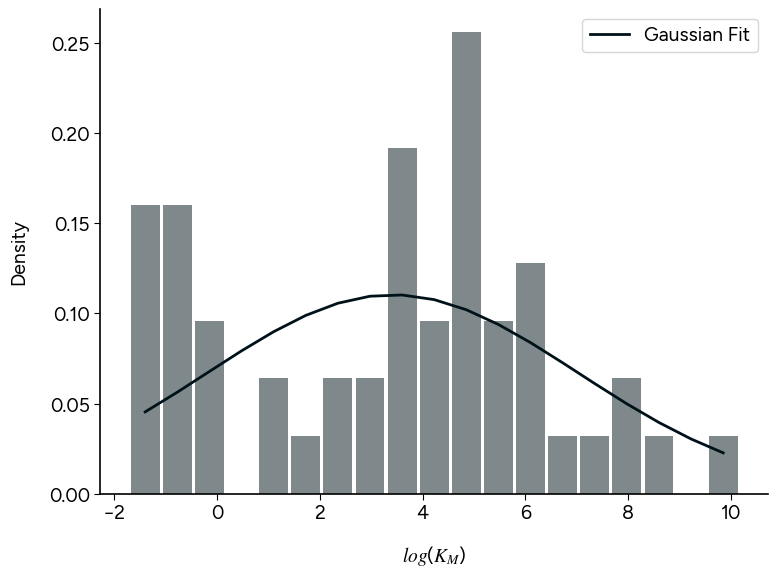

In [273]:
plt.bar(log_km_centers,log_km_hist,width=np.diff(log_km_edges)*0.9,alpha=0.5)
plt.plot(log_km_centers, gaussian_fn(log_km_centers,*log_km_gaussian_fit[0]), label='Gaussian Fit')

plt.legend()

plt.xlabel("$log$($K_M$)")
plt.ylabel("Density")

plt.show()